In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
plt.rc("figure", dpi=200)

In [4]:
rg = np.random.default_rng(0)

In [5]:
import isosplit

In [6]:
def cluster_scatter_2d(X, labels, ax=None):
    ax = ax or plt.gca()
    c = ListedColormap(
        sns.color_palette(palette="colorblind", n_colors=labels.max() + 1)
    )
    ax.scatter(X[0, :], X[1, :], c=c(labels), s=1)

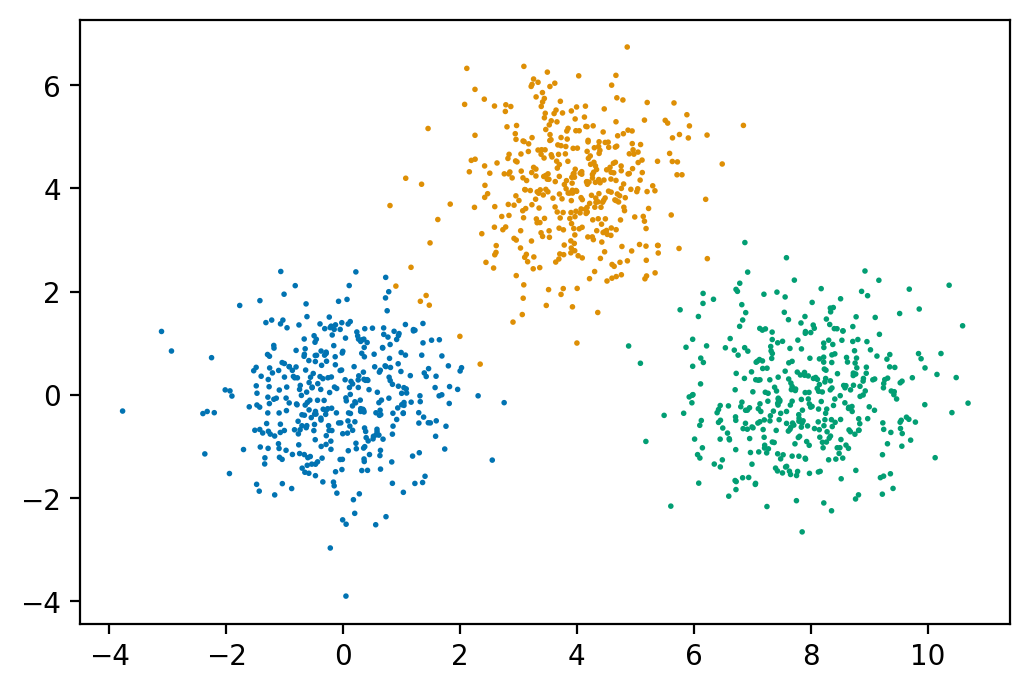

In [7]:
# the test from `run_test.m` -- trivial 2d test
X = np.hstack([
    rg.normal(loc=[[0], [0]], size=(2, 400)),
    rg.normal(loc=[[4], [4]], size=(2, 400)),
    rg.normal(loc=[[8], [0]], size=(2, 400)),
])
labels = isosplit.isosplit5(X, K_init=20)
cluster_scatter_2d(X, labels)
plt.show()

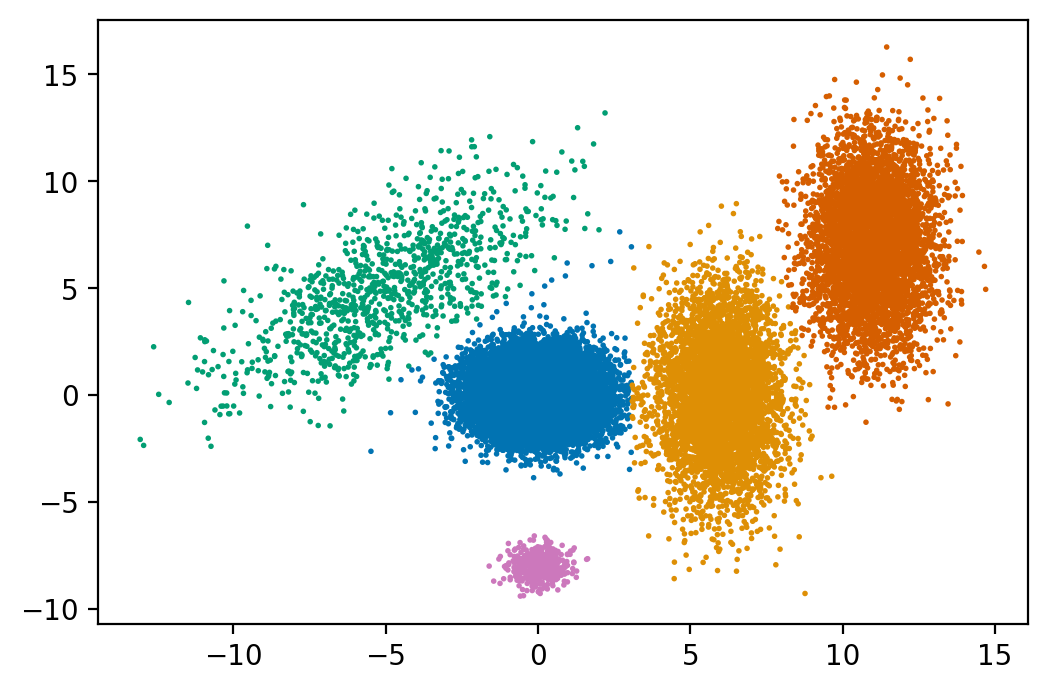

In [8]:
# the test case in `generate_dataset` of `isosplit5.m`
N = 10000
Ns = [2 * N, N // 2, N // 10, N // 20, N // 2]
covs = np.array([
    [[1, 0], [0, 1]],
    [[1, 0], [0, 2.5]],
    [[2.5, 1], [1, 2.5]],
    [[0.5, 0], [0, 0.5]],
    [[1, 0], [0, 2.5]],
])
centers = np.array([[0, 0], [6, 0], [-5, 5], [0, -8], [11, 7]])[..., None]
X = np.hstack([
    c @ rg.standard_normal(size=(2, n)) + z
    for c, n, z in zip(covs, Ns, centers)
])
labels = isosplit.isosplit5(X, whiten_cluster_pairs=1, refine_clusters=0)
cluster_scatter_2d(X, labels)
plt.show()